<a href="https://colab.research.google.com/github/yuski87/15102020/blob/main/UAS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re,string
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

import csv

In [10]:
consumer_key = 'eeGHzMoEm1yBnvBVocoJvz5OE'
consumer_secret = 'VKhulg9uEhAlLis3NtuUbmW8MiYV79uVbTY6gauq3Wi3CysNqi'
access_token = '567007241-QaWjCIGIhDzR8RjGTw4tlPFyQpLcUss7MHxm5Gid'
access_token_secret = '3HeMjSvLbLWQ7wlstu4oelULBsiORUwY6i5HAYMtJCZxJ'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [53]:
csvFile = open('myrep.csv','a', encoding='utf-8')
csvWriter = csv.writer(csvFile)
for tweet in tweepy.Cursor(api.search, q= "MyRepublic",count=2000, 
                          lang='id').items(2000):
    print(tweet.text)
    csvWriter.writerow([tweet.text])

@tanyainrl tim myrepublic
@termanich /. Pake wifi myrepublic
RT @myrepublicnz: We have been made aware of a survey purporting to be from MyRepublic. This scam offers customers the chance to win an iPh…
@myrepublicnz Which I am not going to do. So since that post on the 30th this shit is still on going best solution shit can MyRepublic
@pveyes @imrenagi bro, should put biznet, myrepublic, and other too as a comparison. Any repo?
We have been made aware of a survey purporting to be from MyRepublic. This scam offers customers the chance to win… https://t.co/eZeXgQDM5z
We have been made aware of a survey purporting to be from MyRepublic. This scam offers customers the chance to win… https://t.co/mhUqzi2eY1
@seb0ongie pake myrepublic
@Myrepublic out in Melbourne. Anyone else?
@JesterGFX Hi Jester, thanks for contacting MyRepublic! We are very sorry to hear about your recent issues with you… https://t.co/d3eADjQzo4
fuck yes i'm back with myrepublic
@LKSMDR @infomalang Thank you mbak mya, btw

In [54]:
df = pd.read_csv("myrep.csv", header=None)
df

,0
0,Yuk akhir tahun baru nikmatin diskon yang mena...
1,Myrepublic sudah hadir di sini\nApartment Spri...
2,Myrepublic sudah hadir di sini\nApartment Seno...
3,Myrepublic sudah hadir di sini\nApartment Puri...
4,Myrepublic sudah hadir di sini\nApartment Medi...
...,...
486,Nonton @netflix bermasalah? Myrepublic jawaban...
487,@JeJonathanedgar Sebagus kata orang2 yang tela...
488,@MNCPlayID akhir taun sangatt memuaskan yaaa❤❤...
489,@wicaksonosty Alhamdulillah setelah ganti myre...


In [55]:
def praproses(teks):
    teks = re.sub(r'http\S+','',teks)
    teks = hapus_tanda(teks)
    teks = re.sub(r'#([^\s]+)', r'\1', teks) #hapus #tagger
    teks = re.sub('@[A-Za-z0-9]+', '',teks)  #hapus @
    teks = re.sub(r':([^\s]+)', r'\1', teks) #hapus #tagger
    teks = re.sub('RT[\s]+', '',teks)#hapus RT
    teks = re.sub('https?:\/\/\S+', '',teks)#hapus hyperlink
    teks = re.sub(r'\w*\d\w*', '',teks).strip()#hapus angka dan angka yang berada dalam string
    teks = hapus_katadouble(teks)#hapus repetisi karakter
    teks = teks.lower() #ubah jadi lower case
#     teks = to_kbbi(teks)
    return teks

def hapus_tanda(teks): 
    tanda_baca = set(string.punctuation)
    tanda_baca.update(['…'])
    teks = ''.join(ch for ch in teks if ch not in tanda_baca)
    return teks

def hapus_katadouble(s): 
    #look for 2 or more repetitions of character and replace with the character itself
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1\1", s)

def kbbi(kata): # penyeragaman kata berdasarkan kbbi 
	#kbba = [kamus.strip('\n').strip('\r') for kamus in open('kamus\\kbba.txt')]
	kamus_kata = [kamus.strip('\n').strip('\r') for kamus in open('kbba.txt')]
	#ubah list menjadi dictionary 
	dic = {}
	for i in kamus_kata: 
		(key, val) = i.split('\t')
		dic[str(key)] = val
	#kbbi cocokan 
	final_string = ' '.join(str(dic.get(word, word)) for word in kata).split()
	return final_string

def to_kbbi(teks):
    tek = teks.split()
    tek = kbbi(tek)
    return tek

#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop_w:
            final_text.append(i.strip())
    return " ".join(final_text)
    
#Removing the noisy text
def cleanText(text):
    text = remove_stopwords(text)
    text = praproses(text)
    return text
    

# Load stopword Bahasa Indonesia
stopword_id = pd.read_csv('stopword_id.csv', sep='\t', header=None)
stopword_id.columns = ['word']
stop_w = stopword_id['word'].to_list() #diubah ke list 
# print('ada' in stop_w) # test periksa kata di dalam list stop_w

# def cleanText(teks):
#     teks = re.sub('@[A-Za-z0-9]+', '',teks)  #hapus @
#     teks = re.sub(r'#([^\s]+)', r'\1', teks) #hapus #tagger
#     teks = re.sub('RT[\s]+', '',teks)#hapus RT
#     teks = re.sub('https?:\/\/\S+', '',teks)#hapus hyperlink
#     teks = teks.lower() #ubah jadi lower case
#     teks = re.sub(r"[-()\"#/@;:<>{}=~|.?,]", "", teks)
#     import string
#     killpunctuation = str.maketrans('', '', string.punctuation)
#     return teks

#Apply function on review column
df[0] = df[0].apply(cleanText)

df

,0
0,yuk nikmatin diskon menarik myrepublic area se...
1,myrepublic hadir apartment spring hill kemayoran
2,myrepublic hadir apartment senopati suites
3,myrepublic hadir apartment puri kemayoran
4,myrepublic hadir apartment mediterania gajah mada
...,...
486,nonton netflix bermasalah myrepublic jawabannya
487,jejonathanedgar sebagus myrepublic
488,mncplayid taun sangatt memuaskan yaa❤❤ enaknya...
489,wicaksonosty alhamdulillah ganti myrepublic in...


In [56]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity


df['Polarity'] = df[0].apply(getPolarity)
df['Subjectivity'] = df[0].apply(getSubjectivity)

df

,0,Polarity,Subjectivity
0,yuk nikmatin diskon menarik myrepublic area se...,0.0,0.0
1,myrepublic hadir apartment spring hill kemayoran,0.0,0.0
2,myrepublic hadir apartment senopati suites,0.0,0.0
3,myrepublic hadir apartment puri kemayoran,0.0,0.0
4,myrepublic hadir apartment mediterania gajah mada,0.0,0.0
...,...,...,...
486,nonton netflix bermasalah myrepublic jawabannya,0.0,0.0
487,jejonathanedgar sebagus myrepublic,0.0,0.0
488,mncplayid taun sangatt memuaskan yaa❤❤ enaknya...,0.0,0.0
489,wicaksonosty alhamdulillah ganti myrepublic in...,0.0,0.0


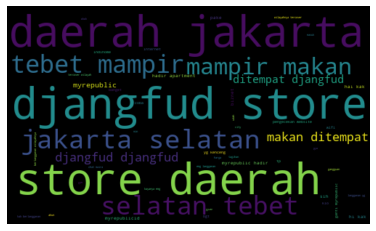

In [57]:
allWords =' '.join([twts for twts in df[0]])
wc = WordCloud(width = 500 , height = 300 , random_state=10, max_font_size=110).generate(allWords)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [58]:
 #untuk menambahkan sentimen positif, negatif / netral dari polarity yg sudah dihitung
def getAnalysisSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
        
df['Analysis'] = df['Polarity'].apply(getAnalysisSentiment)

df

,0,Polarity,Subjectivity,Analysis
0,yuk nikmatin diskon menarik myrepublic area se...,0.0,0.0,Neutral
1,myrepublic hadir apartment spring hill kemayoran,0.0,0.0,Neutral
2,myrepublic hadir apartment senopati suites,0.0,0.0,Neutral
3,myrepublic hadir apartment puri kemayoran,0.0,0.0,Neutral
4,myrepublic hadir apartment mediterania gajah mada,0.0,0.0,Neutral
...,...,...,...,...
486,nonton netflix bermasalah myrepublic jawabannya,0.0,0.0,Neutral
487,jejonathanedgar sebagus myrepublic,0.0,0.0,Neutral
488,mncplayid taun sangatt memuaskan yaa❤❤ enaknya...,0.0,0.0,Neutral
489,wicaksonosty alhamdulillah ganti myrepublic in...,0.0,0.0,Neutral


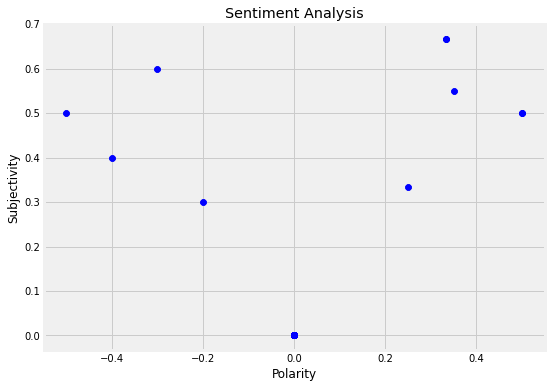

In [59]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color="Blue")
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [60]:
df['Analysis'].value_counts()

Neutral     471
Positive     12
Negative      8
Name: Analysis, dtype: int64

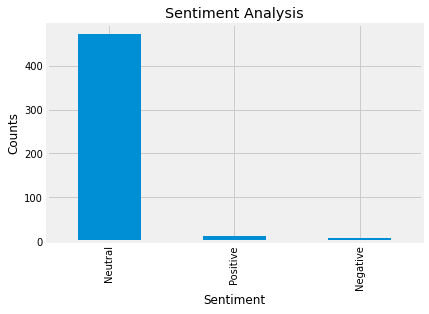

In [61]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind ='bar')
plt.show()